In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
df = pd.read_csv('../input/train.csv', index_col='PassengerId')
X_test_full = pd.read_csv('../input/test.csv', index_col='PassengerId')

df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [17]:
print(df.isna().sum(), "\n")
print(X_test_full.isna().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64 

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [18]:
y = df.Survived
X_full = df.drop(['Survived'], axis=1)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = X_full[features].copy()
X_test = X_test_full[features].copy()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=67)

imp = SimpleImputer()

X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, axis=1)
X_train, X_test = X_train.align(X_test, axis=1)
X_all = pd.get_dummies(X)

imp_X_train = pd.DataFrame(imp.fit_transform(X_train))
imp_X_valid = pd.DataFrame(imp.fit_transform(X_valid))
imp_X_test = pd.DataFrame(imp.fit_transform(X_test))
imp_X_all = pd.DataFrame(imp.fit_transform(X_all))

imp_X_train.columns = X_train.columns
imp_X_valid.columns = X_valid.columns
imp_X_test.columns = X_test.columns
imp_X_all.columns = X_all.columns

imp_X_test.index = X_test.index

In [20]:
def discretise(value):
    if value < 0.5:
        return 0
    return 1

/home/vpy/.local/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


validation_0
validation_1
0.22905027932960895
150


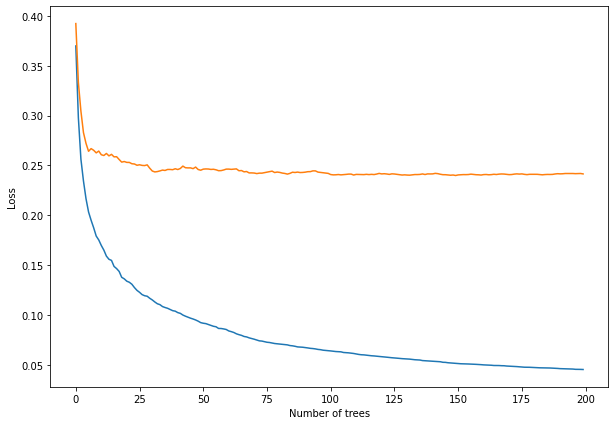

In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

model = XGBClassifier(n_estimators = 1000, learning_rate=0.5, n_jobs=6, random_state=67, use_label_encoder=False, eval_metric='mae')

model.fit(imp_X_train, y_train, early_stopping_rounds=50, eval_set=[(imp_X_train, y_train), (imp_X_valid, y_valid)], verbose=False)

preds = model.predict(imp_X_valid)

results = model.evals_result()

for i in results:
    print(i)
from matplotlib import pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["mae"], label="Validation loss")
plt.plot(results["validation_1"]["mae"], label="Training loss")
plt.xlabel("Number of trees")
plt.ylabel("Loss")

print(mean_absolute_error(preds, y_valid))

print(model.best_ntree_limit)

In [ ]:
model = XGBClassifier(n_estimators = 8, learning_rate=0.5, n_jobs=6, random_state=67, use_label_encoder=False, eval_metric='logloss')

model.fit(imp_X_all, y)

preds = model.predict(imp_X_test)

output = pd.DataFrame({'PassengerId' : imp_X_test.index, 'Survived' : preds}).set_index('PassengerId')

output.to_csv('../submission/basic_xgboost.csv')

print(output)

             Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 1
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]
